In [58]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [59]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [60]:
train_file= pd.read_csv('/content/drive/MyDrive/Corona_NLP/Corona_NLP_train.csv')
test_file= pd.read_csv('/content/drive/MyDrive/Corona_NLP/Corona_NLP_test.csv')

In [61]:
train_ds= tf.data.Dataset.from_tensor_slices((train_file.OriginalTweet, train_file.Sentiment))
test_ds= tf.data.Dataset.from_tensor_slices((test_file.OriginalTweet, test_file.Sentiment))

In [62]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [63]:
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [64]:
VOCAB_SIZE = 10000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_mode='int', output_sequence_length=200)
encoder.adapt(train_ds.map(lambda text, label: text))

In [65]:
model = tf.keras.Sequential([
    encoder,
    layers.Embedding(len(encoder.get_vocabulary()), 128, mask_zero=True),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Dropout(0.5),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

In [66]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_5 (TextV  (None, 200)              0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200, 128)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                      

In [67]:
history = model.fit(train_ds, epochs=3,
                    validation_data=test_ds,
                    validation_steps=30)

Epoch 1/3
523/523 [==============================] - 553s 1s/step - loss: 0.5643 - accuracy: 0.6791 - val_loss: 0.4532 - val_accuracy: 0.7974
Epoch 2/3
523/523 [==============================] - 534s 1s/step - loss: 0.2953 - accuracy: 0.8844 - val_loss: 0.3737 - val_accuracy: 0.8411
Epoch 3/3
523/523 [==============================] - 531s 1s/step - loss: 0.2138 - accuracy: 0.9218 - val_loss: 0.3756 - val_accuracy: 0.8396


In [68]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

50/50 [==============================] - 12s 237ms/step - loss: 0.3753 - accuracy: 0.8424
Test Loss: 0.37525439262390137
Test Accuracy: 0.8424032926559448


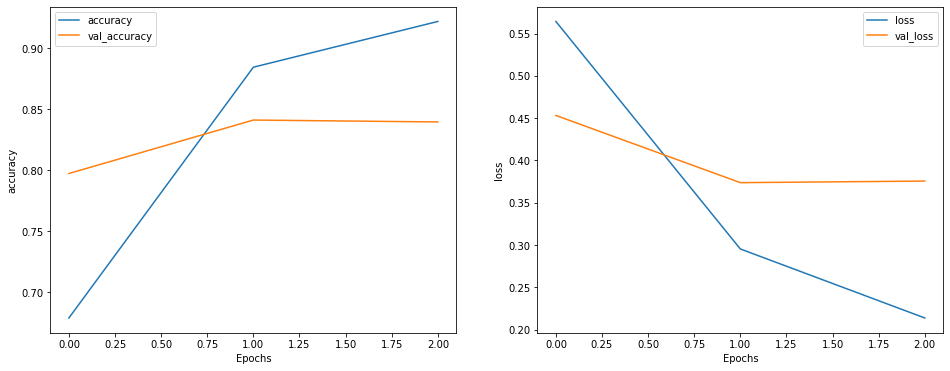

In [69]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [78]:
s2n={0.0:'Negative', 1.0:'Positive'}

In [85]:
sample_text = ('The good news is that vaccines are working.')
predictions = s2n[np.round(model.predict(np.array([sample_text]))[0][0])]
print(sample_text)
print(predictions)

The good news is that vaccines are working.
Positive
